## MNIST using Deep Neural Network

#### Architecture of the Network

+ input: [batch_size, 28,28,1], Apply 32 filter of [5x5]
+ Convolution Layer 1: [batch_size, 28,28,32]
+ ReLU 1: [?,28,28,32]
+ Maxpooling 1: [?,14,14,32]

+ Convolution Layer 2: [?,14,14,64]
+ ReLU 2: [?,14,14,64]
+ Maxpooling 2: [?,7,7,64]

+ Fully Connected Layer 3: [1x1024]
+ ReLU 3: [1x1024]
+ Dropout : [1x1024]

+ Fully Connected Layer 4: [1x10]

#### Start the Interactive Session

In [5]:
import tensorflow as tf


#finish possible remaining session
sess.close()

#start the Interctive Session
sess = tf.InteractiveSession()

#### Import MNIST Data

In [6]:
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets("MNIST data", one_hot = True)

Extracting MNIST data/train-images-idx3-ubyte.gz
Extracting MNIST data/train-labels-idx1-ubyte.gz
Extracting MNIST data/t10k-images-idx3-ubyte.gz
Extracting MNIST data/t10k-labels-idx1-ubyte.gz


#### Set Initial Parameters

In [9]:
# Width and Height of the Image in Pixels
width = 28
height = 28

# number of pixels in one image
flat = width * height

# number of possible classification for problem
class_output = 10

print(flat)

784


#### Input and Output

Create placeholders for inputs and outputs

In [10]:
x = tf.placeholder(tf.float32, shape = [None, flat])
y_ = tf.placeholder(tf.float32, shape = [None, class_output])

#### Converting Images of Dataset into Tensors

+ The input image is 28x28 pixels, 1 channel (grayscale)
+ Fist Dimension is the batch number of teh image, and can be of any size (so set it to -1)

+ Second Dimension: width (28)

+ Third Dimension: height (28)

+ Fourth Dimension: Image Channel (1)

In [11]:
x_images = tf.reshape(x, [-1,28,28,1])
x_images

<tf.Tensor 'Reshape:0' shape=(?, 28, 28, 1) dtype=float32>

### Convolution Layer 1
#### Define Kernel Wight and Bias

+ Size of the filter/kernel is [5x5]
+ input channel is 1 (grayscale)
+ 32 different feture map is needed,
    + ie, 32 different filters are applied on each image.
+ So, the output of the convolution would be (28x28x32)
+ Create a filter/kernel tensor of shape [filter_height, filter_width, in_channels, out_channels]

In [12]:
W_conv1 = tf.Variable(tf.truncated_normal([5,5,1,32], stddev = 0.1))
b_conv1 = tf.Variable(tf.constant(0.1, shape = [32]))

In [13]:
W_conv1

<tf.Variable 'Variable:0' shape=(5, 5, 1, 32) dtype=float32_ref>

In [14]:
b_conv1

<tf.Variable 'Variable_1:0' shape=(32,) dtype=float32_ref>

#### Convolution with Weight tensor and add biases
To create convolutional layer, use tf.nn.conv2d, it computes a 2D convolution given 4D input and filter tensors.

+ inputs:
    + tensor of shape = [batch, in_height, in_width, in_channels].
    + x of shape = [batch_size, 28,28,1]
    + filter/kernel tensor of shape = [filter_height, filter_width, in_channels, out_channels].
    + W of size = [5,5,1,32]
    + strides = [1,1,1,1]
        + The convolutional layer slides the kernel window across the input tensor. As the input tensor has 4 Dimension: [batch, height, width, channels].
        + then the convolution operates on a 2D window on the height and width dimensions.
        + Strides determines how much the window shifts by in each of the dimensions.
        + As the first and last dimensions are related to batch and channels, set stride = 1
        + Considering second and third dimensions we could set other value eg stride = [1,2,2,1]
        

+ Process:
    + Change the filter to a 2D matrix with shape [5*5*1,32]
    + Extracts image patches from the input tensor to form a virtual tensor of shape [batch, 28,28,5*5*1]
    + For each batch, right-multiplies the filter matrix and the image vector.
    


+ Output:
    + A tensor (2D Convolution) of size
    + tf.tensor "add 7.0" shape = (?, 28,28,32)
    + The output of the first convolution layer is 32[28,28] images.
    + Here 32 is considered as the volume/depth of the output image.

<img src="https://ibm.box.com/shared/static/vn26neef1nnv2oxn5cb3uueowcawhkgb.png" style="width: 800px; height: 400px;" alt="HTML5 Icon" >

In [16]:
convolve1 = tf.nn.conv2d(x_images, W_conv1, strides = [1,1,1,1], padding = "SAME") + b_conv1

In [17]:
convolve1

<tf.Tensor 'add:0' shape=(?, 28, 28, 32) dtype=float32>

<img src="https://ibm.box.com/shared/static/iizf4ui4b2hh9wn86pplqxu27ykpqci9.png" style="width: 800px; height: 400px;" alt="HTML5 Icon" >

#### Apply the ReLU Activation Function

+ Applying ReLU, which means swap any negative number with a zero from convolve1.
+ Function of ReLU is to keep the Non-Linearitywith in the system.

In [18]:
h_conv1 = tf.nn.relu(convolve1)

In [19]:
h_conv1

<tf.Tensor 'Relu:0' shape=(?, 28, 28, 32) dtype=float32>

#### Apply Max Pooling

+ Maxpooling is a form of non-linear down sampling.
+ It partitions the image into a set of rectangles, and find the maximum value for that region.
+ use tf.nn.max_pool
+ kernel size = 2x2
+ Strides: it dictates the sliding behaviour of the kernel
    + Here it will moves 2 pixel everytime, so there is no overlapping.
+ The input matrix size = [28,28,32]
+ The output will be = [14,14,32]

In [20]:
conv1 = tf.nn.max_pool(h_conv1, ksize = [1,2,2,1], strides = [1,2,2,1], padding = "SAME")
conv1

<tf.Tensor 'MaxPool:0' shape=(?, 14, 14, 32) dtype=float32>

<img src="https://ibm.box.com/shared/static/kmaja90mn3aud9mro9cn8pbbg1h5pejy.png" alt="HTML5 Icon" style="width: 800px; height: 400px;">

the output of maxpooling.
Here, the First layer Completed

### Convolutional Layer 2
#### Weights and Biases of Kernel

+ Apply Convolution again this Layer.
+ Kernel for Second Layer.
    + filter/kernel : 5x5 (25 pixels)
    + input channels: 32 (from the 1st convolution layer, we had 32 feature map)
    + 64 output feature map
    
+ Here, input image is [14x14x32] and the filter is [5x5x32]. Use 64 filters of Size [5x5x32] and the output of the convolutional layer would be 64 convolved image [14x14x64]

+ The Convolution result of applying filter of size [5x5x32], on image of size [14x14x32] is an image size [14x14x1].ie, Convolution is Functioning on Volume

In [21]:
W_conv2 = tf.Variable(tf.truncated_normal([5,5,32,64], stddev = 0.1))
b_conv2 = tf.Variable(tf.constant(0.1, shape = [64]))

#### Convolution of Image with weight tensor and add biases

In [22]:
convolve2 = tf.nn.conv2d(conv1, W_conv2, strides = [1,1,1,1], padding = "SAME") + b_conv2

convolve2

<tf.Tensor 'add_1:0' shape=(?, 14, 14, 64) dtype=float32>

#### Apply ReLU Activation Function

In [24]:
h_conv2 = tf.nn.relu(convolve2)
h_conv2

<tf.Tensor 'Relu_2:0' shape=(?, 14, 14, 64) dtype=float32>

#### Apply Max-Pooling

In [25]:
conv2 = tf.nn.max_pool(h_conv2, ksize = [1,2,2,1], strides = [1,2,2,1], padding = "SAME")
conv2

<tf.Tensor 'MaxPool_1:0' shape=(?, 7, 7, 64) dtype=float32>

+ Second Layer is Completed.
+ Output is 64 matrix of 7x7

#### Fully Connected Layer

+ Fully Connected Layer is Important to use softmax and create the probabilities in the end.

+ Fully Connected Layer take these (all 64 matrices) high level images from previous layer, and convert them to flat array.

+ So, each, matrix [7x7] will be converted to a matrix of [49x1] and then all of the 64 matrices will be connected, which makes an array of size [3136x1]

+ We wil connect it into another layer of size [1024x1]

+ So the Weight between these 2 layers will be [3136x1024]

<img src="https://ibm.box.com/shared/static/pr9mnirmlrzm2bitf1d4jj389hyvv7ey.png" alt="HTML5 Icon" style="width: 800px; height: 400px;"> 

#### Flattening the Second Layer

In [27]:
layer2_matrix = tf.reshape(conv2, [-1, 7*7*64])
layer2_matrix

<tf.Tensor 'Reshape_2:0' shape=(?, 3136) dtype=float32>

#### Weights and Biases between layer 2 and 3

+ Composition of the feature map from the last layer (7x7) multiplied by the number of feature maps (64): 
+ 1027 output to Softmax Layer

In [28]:
W_fc1 = tf.Variable(tf.truncated_normal([7*7*64, 1024], stddev = 0.1))

# need 1024 biases for 1024 outputs
b_fc1 = tf.Variable(tf.constant(0.1, shape = [1024]))

In [29]:
W_fc1

<tf.Variable 'Variable_4:0' shape=(3136, 1024) dtype=float32_ref>

In [30]:
b_fc1

<tf.Variable 'Variable_5:0' shape=(1024,) dtype=float32_ref>

#### Applying Weights and Biases (Matrix Multiplication)

In [31]:
fc1 = tf.matmul(layer2_matrix, W_fc1) + b_fc1

In [32]:
fc1

<tf.Tensor 'add_2:0' shape=(?, 1024) dtype=float32>

#### Applying the ReLU Activation Function

In [33]:
h_fc1 = tf.nn.relu(fc1)
h_fc1

<tf.Tensor 'Relu_3:0' shape=(?, 1024) dtype=float32>

Here, The Third Layer Completed

#### Drop Out Layer
+ Used to Reduce Overfitting

+ It's a phase where the network forget some features

+ At every training step in a mini-batch, some units get switched off randomly so that it will not interact with the network further more.

+ ie, its weights cannot be updated, nor affect the learning of the other network nodes.

In [34]:
keep_prob = tf.placeholder(tf.float32)

layer_drop = tf.nn.dropout(h_fc1, keep_prob)
layer_drop

<tf.Tensor 'dropout/mul:0' shape=(?, 1024) dtype=float32>

#### ReadOut Layer
+ It's a Fully Connected Layer of Softmax Type

+ Weights and Biases
    + In the Last Layer, CNN takes the high level filtered images and translates them into votes using softmax
    + input channels = 1024 (Neurons from 3rd Layer)
    + output feature = 10

In [35]:
W_fc2 =tf.Variable(tf.truncated_normal([1024,10], stddev = 0.1))
# 10 possibilities for digits [0,1,2,3,4,5,6,7,8,9]

b_fc2 = tf.Variable(tf.constant(0.1, shape = [10]))

In [36]:
W_fc2

<tf.Variable 'Variable_6:0' shape=(1024, 10) dtype=float32_ref>

In [37]:
b_fc2

<tf.Variable 'Variable_7:0' shape=(10,) dtype=float32_ref>

#### Applying Weights and Biases (Matrix Multiplication)

In [38]:
fc = tf.matmul(layer_drop, W_fc2) + b_fc2

In [39]:
fc

<tf.Tensor 'add_3:0' shape=(?, 10) dtype=float32>

#### Applying Softmax Activation Function
+ Softmax allows to interpret the outputs of the fc as probabilities.
+ So y_conv is a Tensor of Probabilities

In [40]:
y_CNN = tf.nn.softmax(fc)
y_CNN

<tf.Tensor 'Softmax:0' shape=(?, 10) dtype=float32>

## Define Functions and Training Model

#### Define the Loss Function

+ To compare the output, layer4tensor with the ground truth for all mini-batch, Use cross entropy to see how bad the CNN is working.

In [41]:
import numpy as np

layer4_test = [[0.9,0.1,0.1],[0.9,0.1,0.1]]
y_test = [[1.0,0.0,0.0],[1.0,0.0,0.0]]
np.mean(-np.sum(y_test * np.log(layer4_test), 1))

0.10536051565782628

+ reduce_sum computes the sum of elements of y_ * tf.log(layer4) across second dimension of the tensor.

+ reduce_mean computes the mean of all elements in the tensor

In [42]:
cross_entropy = tf.reduce_mean(-tf.reduce_sum(y_ * tf.log(y_CNN), reduction_indices = [1]))

In [43]:
cross_entropy

<tf.Tensor 'Mean:0' shape=() dtype=float32>

#### Define Optimizer

+ We want to minimize the error of the network which is calculated by cross_entropy matrix

+ For that, compute gradients for the loss function (which is minimizing the cross entropy) and apply gradients to variables.

+ Done by optimizer: Gradient Descent or AdamGrad

In [44]:
train_step = tf.train.AdamOptimizer(1e-4).minimize(cross_entropy)

#### Define Prediction

In [45]:
correct_prediction = tf.equal(tf.argmax(y_CNN, 1), tf.argmax(y_, 1))

In [46]:
correct_prediction

<tf.Tensor 'Equal:0' shape=(?,) dtype=bool>

#### Define Accuracy

In [47]:
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

In [48]:
accuracy

<tf.Tensor 'Mean_1:0' shape=() dtype=float32>

#### Run Session, and Train.

In [49]:
sess.run(tf.global_variables_initializer())

In [50]:
for i in range(1100):
    batch = mnist.train.next_batch(50)
    if i%100 == 0:
        train_accuracy = accuracy.eval(feed_dict={x:batch[0], y_: batch[1], keep_prob: 1.0})
        print("step %d, training accuracy %g"%(i, float(train_accuracy)))
    train_step.run(feed_dict={x: batch[0], y_: batch[1], keep_prob: 0.5})

step 0, training accuracy 0.1
step 100, training accuracy 0.76
step 200, training accuracy 0.88
step 300, training accuracy 0.96
step 400, training accuracy 0.98
step 500, training accuracy 0.98
step 600, training accuracy 0.98
step 700, training accuracy 0.94
step 800, training accuracy 0.94
step 900, training accuracy 0.96
step 1000, training accuracy 0.98


#### Evaluate the Model
+ Print the Evaluation to the User

In [51]:
# evaluate in batches to avoid out-of-memory issues
n_batches = mnist.test.images.shape[0] // 50
cumulative_accuracy = 0.0
for index in range(n_batches):
    batch = mnist.test.next_batch(50)
    cumulative_accuracy += accuracy.eval(feed_dict={x: batch[0], y_: batch[1], keep_prob: 1.0})
print("test accuracy {}".format(cumulative_accuracy / n_batches))

test accuracy 0.9667999994754791


#### Visualization
+ To look at all the Filters

In [52]:
kernels = sess.run(tf.reshape(tf.transpose(W_conv1, perm=[2, 3, 0,1]),[32, -1]))

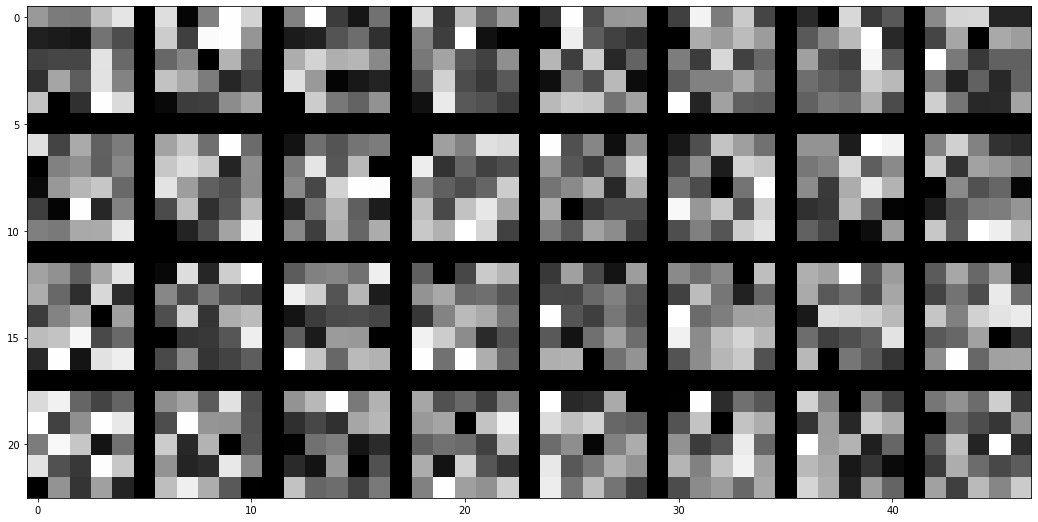

In [54]:

import utils1
from utils1 import tile_raster_images
import matplotlib.pyplot as plt
from PIL import Image
%matplotlib inline
image = Image.fromarray(tile_raster_images(kernels, img_shape=(5, 5) ,tile_shape=(4, 8), tile_spacing=(1, 1)))
### Plot image
plt.rcParams['figure.figsize'] = (18.0, 18.0)
imgplot = plt.imshow(image)
imgplot.set_cmap('gray')  

+ See the Output of an Image passing through first Convolutional Layer

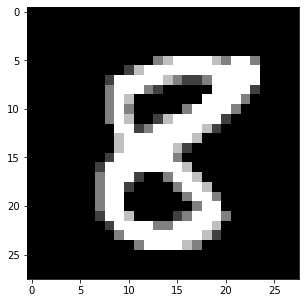

In [55]:
import numpy as np
plt.rcParams['figure.figsize'] = (5.0, 5.0)
sampleimage = mnist.test.images[1]
plt.imshow(np.reshape(sampleimage,[28,28]), cmap="gray")

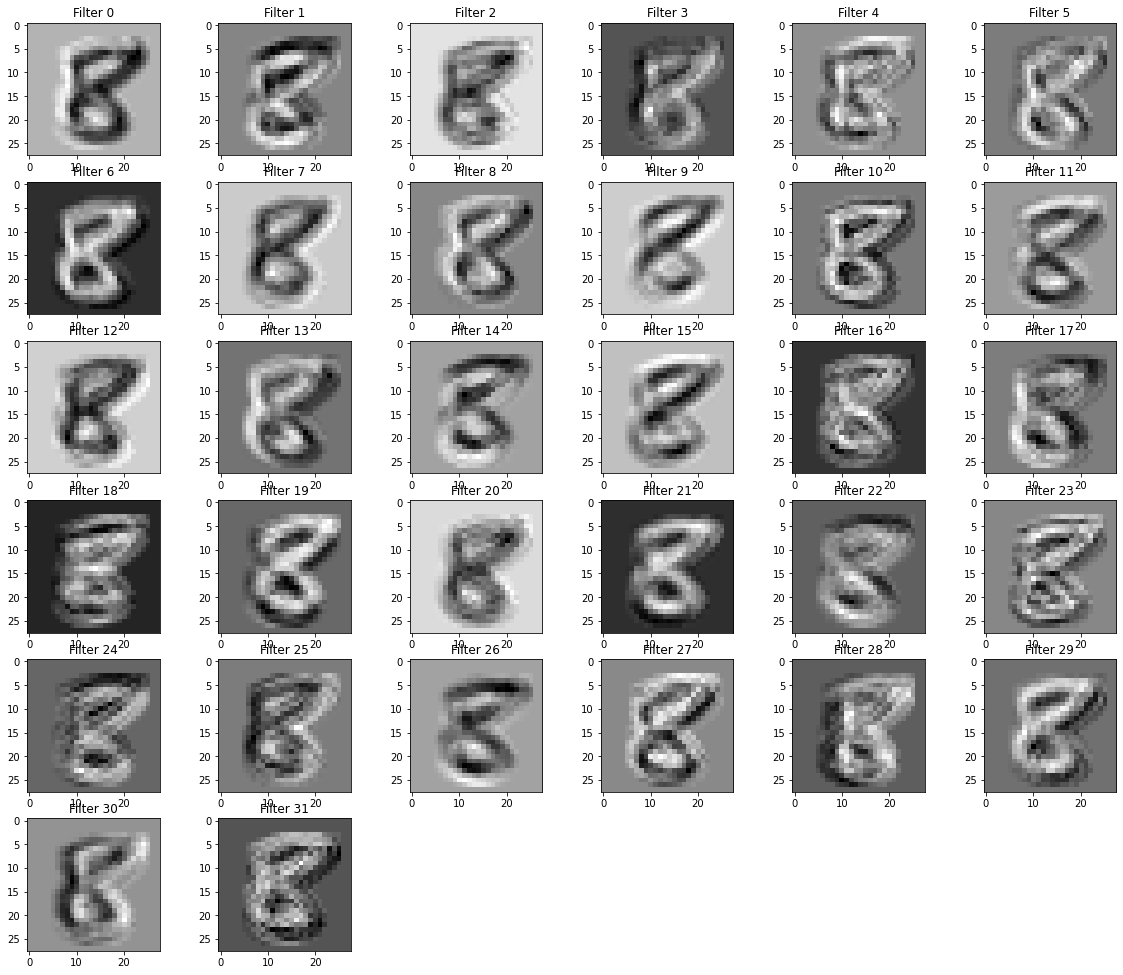

In [56]:
ActivatedUnits = sess.run(convolve1,feed_dict={x:np.reshape(sampleimage,[1,784],order='F'),keep_prob:1.0})
filters = ActivatedUnits.shape[3]
plt.figure(1, figsize=(20,20))
n_columns = 6
n_rows = np.math.ceil(filters / n_columns) + 1
for i in range(filters):
    plt.subplot(n_rows, n_columns, i+1)
    plt.title('Filter ' + str(i))
    plt.imshow(ActivatedUnits[0,:,:,i], interpolation="nearest", cmap="gray")

+ See the output of an image passing through second convolutional layer

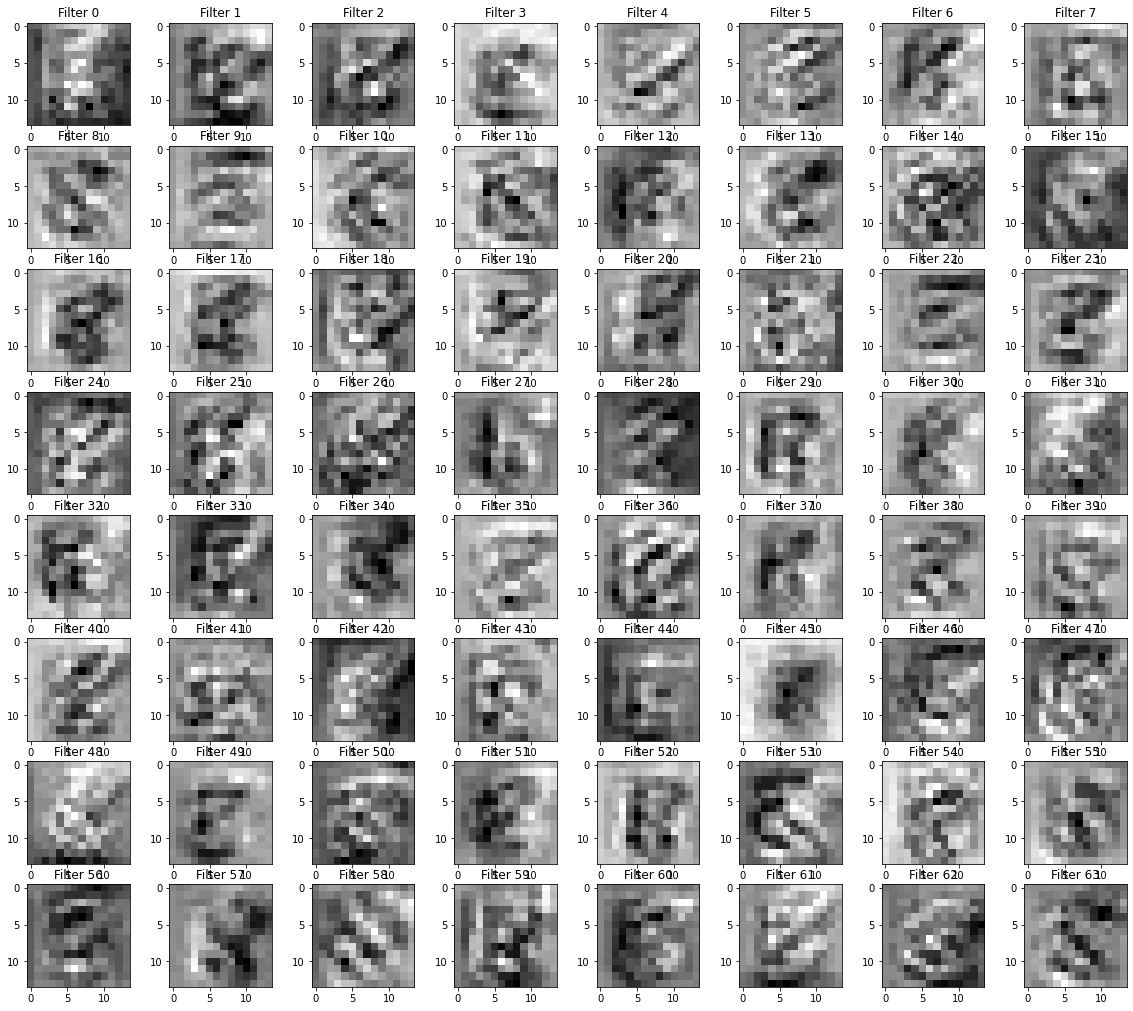

In [57]:
ActivatedUnits = sess.run(convolve2,feed_dict={x:np.reshape(sampleimage,[1,784],order='F'),keep_prob:1.0})
filters = ActivatedUnits.shape[3]
plt.figure(1, figsize=(20,20))
n_columns = 8
n_rows = np.math.ceil(filters / n_columns) + 1
for i in range(filters):
    plt.subplot(n_rows, n_columns, i+1)
    plt.title('Filter ' + str(i))
    plt.imshow(ActivatedUnits[0,:,:,i], interpolation="nearest", cmap="gray")

#### Finish the Session

In [58]:
sess.close()

#### Summary of the